In [115]:
# Veriyi incelerken ve modellerken kullanacağımız kütüphaneleri import edelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [116]:
# Veri dosyasını yükleme
car_dataset = pd.read_csv('car_dataset.csv')

In [117]:
# Veri setine genel bakış
car_dataset.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price,car_brand,car_model
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0,Hyundai,Model X
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5,Ford,F-150
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0,Audi,Accord
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5,Chevrolet,Accord
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5,Hyundai,Corolla


In [118]:
# Veri setindeki satır ve sütun sayılarını öğrenme
car_dataset.shape

(1000, 14)

In [119]:
# Veri setindeki kolon isimlerini, değişken tiplerini öğrenme
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
 12  car_brand      1000 non-null   object 
 13  car_model      1000 non-null   object 
dtypes: float64(1), int64(11), object(2)
memory usage: 109.5+ KB


In [120]:
# Eksik veri olup olmadığının kontrol edilmesi
print(car_dataset.isnull().sum())

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
car_brand        0
car_model        0
dtype: int64


In [121]:
# sayısal veri içeren sütunları seçelim
numeric_columns = car_dataset.select_dtypes(include=np.number).columns

# eksik veri olan kısımları bu sütunların ortalama değerleri ile dolduralım
car_dataset[numeric_columns] = car_dataset[numeric_columns].fillna(car_dataset[numeric_columns].mean())


In [122]:
# gereksiz sütunları droplayalım
car_dataset = car_dataset.drop(['car_model', 'v.id'], axis=1)


In [123]:
car_dataset.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price,car_brand
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0,Hyundai
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5,Ford
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0,Audi
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5,Chevrolet
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5,Hyundai


In [124]:
from sklearn.preprocessing import OneHotEncoder

# car_brand seçelim
categorical_columns = ['car_brand']

# OneHotEncoder'ı tanımlayalım
encoder = OneHotEncoder(sparse_output=False, drop=None)

# Kategorik sütunları encode edelim
encoded_data = encoder.fit_transform(car_dataset[categorical_columns])

# Encode edilen veriyi DataFrame'e çevirelim ve sütun isimlerini belirleyelim
encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Orijinal veri setini encode edilen veri ile birleştirelim
df_encoded = pd.concat([car_dataset.drop(columns=categorical_columns), encoded_df], axis=1)

# Sonuçları kontrol edelim
print(df_encoded.head())


   on road old  on road now  years      km  rating  condition  economy  \
0       535651       798186      3   78945       1          2       14   
1       591911       861056      6  117220       5          9        9   
2       686990       770762      2  132538       2          8       15   
3       573999       722381      4  101065       4          3       11   
4       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  ...  car_brand_Audi  car_brand_BMW  \
0        177  73     123  ...             0.0            0.0   
1        148  74      95  ...             0.0            0.0   
2        181  53      97  ...             1.0            0.0   
3        197  54     116  ...             0.0            0.0   
4        160  53     105  ...             0.0            0.0   

   car_brand_Chevrolet  car_brand_Ford  car_brand_Honda  car_brand_Hyundai  \
0                  0.0             0.0              0.0                1.0   
1             

In [125]:
df_encoded.columns

Index(['on road old', 'on road now', 'years', 'km', 'rating', 'condition',
       'economy', 'top speed', 'hp', 'torque', 'current price',
       'car_brand_Audi', 'car_brand_BMW', 'car_brand_Chevrolet',
       'car_brand_Ford', 'car_brand_Honda', 'car_brand_Hyundai',
       'car_brand_Kia', 'car_brand_Mercedes-Benz', 'car_brand_Nissan',
       'car_brand_Toyota'],
      dtype='object')

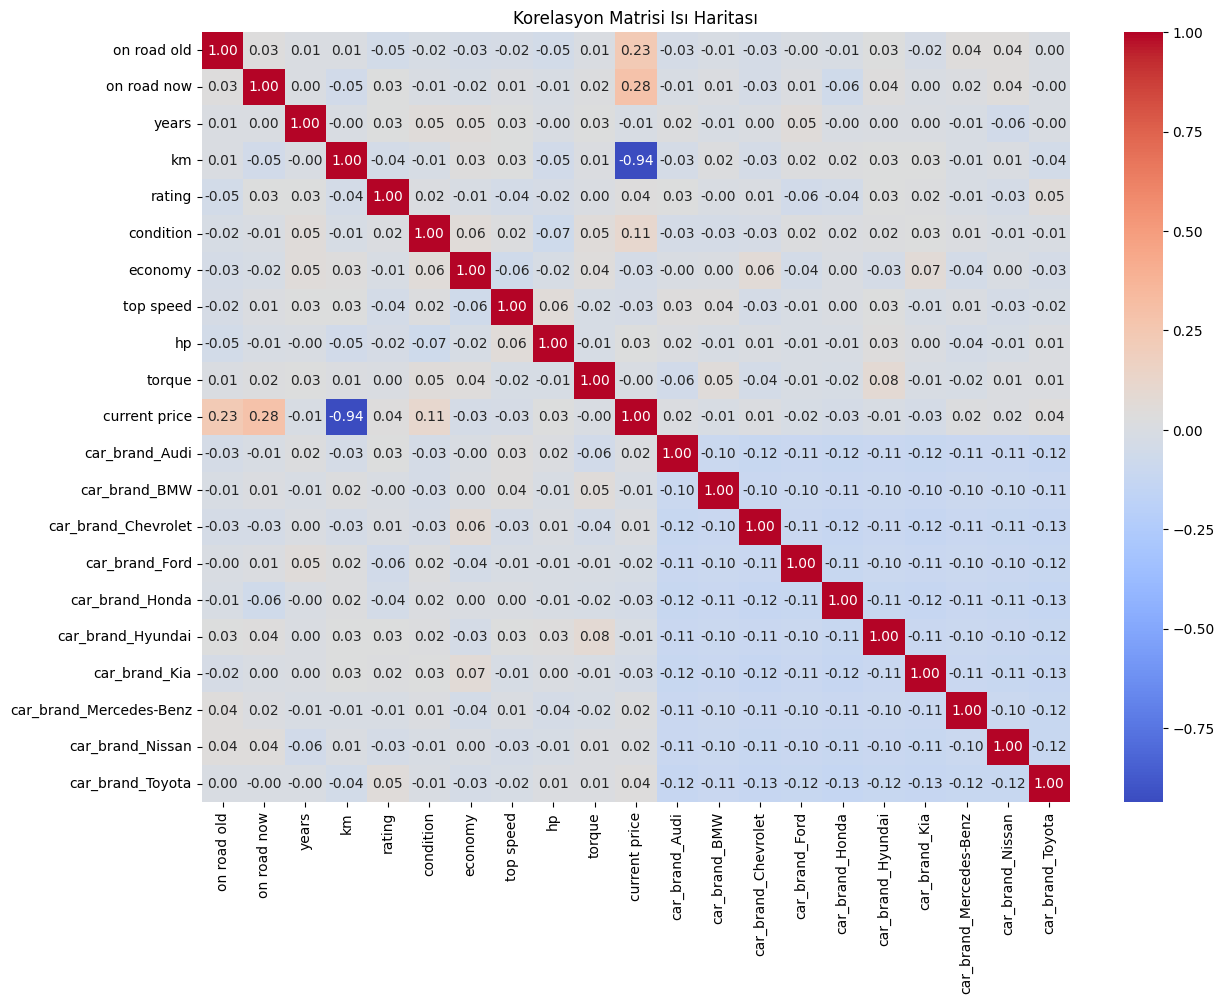

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setindeki sadece sayısal sütunlarını seçelim
numeric_data = df_encoded.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisi
correlation_matrix = numeric_data.corr()

# Korelasyon matrisi ısı haritası
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi Isı Haritası")
plt.show()

In [127]:
# eğitim için kullanacağımız verileri belirledik ve gerekli düzenlemeleri yaptık
X = df_encoded.drop(columns=['current price'])
y = df_encoded['current price']  # Tahmin edeceğimiz hedef değişken

In [128]:
print(X)

     on road old  on road now  years      km  rating  condition  economy  \
0         535651       798186      3   78945       1          2       14   
1         591911       861056      6  117220       5          9        9   
2         686990       770762      2  132538       2          8       15   
3         573999       722381      4  101065       4          3       11   
4         691388       811335      6   61559       3          9       12   
..           ...          ...    ...     ...     ...        ...      ...   
995       633238       743850      5  125092       1          6       11   
996       599626       848195      4   83370       2          9       14   
997       646344       842733      7   86722       1          8        9   
998       535559       732439      2  140478       4          5        9   
999       590105       779743      5   67295       4          2        8   

     top speed   hp  torque  car_brand_Audi  car_brand_BMW  \
0          177   73     1

In [129]:
print(y)

0      351318.0
1      285001.5
2      215386.0
3      244295.5
4      531114.5
         ...   
995    190744.0
996    419748.0
997    405871.0
998     74398.0
999    414938.5
Name: current price, Length: 1000, dtype: float64


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# veri setinin %20lik kısmını test için ayırdık ve lineer regresyon algoriması ile modelimizi eğitiyoruz
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [131]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

# modeli değerlendirmek için gerekli değerler
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", RMSE)
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 83771648.15887657
RMSE: 9152.685297707803
R2 Score: 0.9950168471121504


In [132]:
mean_target = y_test.mean()  # Hedef değişkenin ortalamasını bulalım ve hata oranını hesaplayalım
error_percentage = (RMSE / mean_target) * 100
print(f"Hata Oranı: {error_percentage:.2f}%")


Hata Oranı: 2.94%


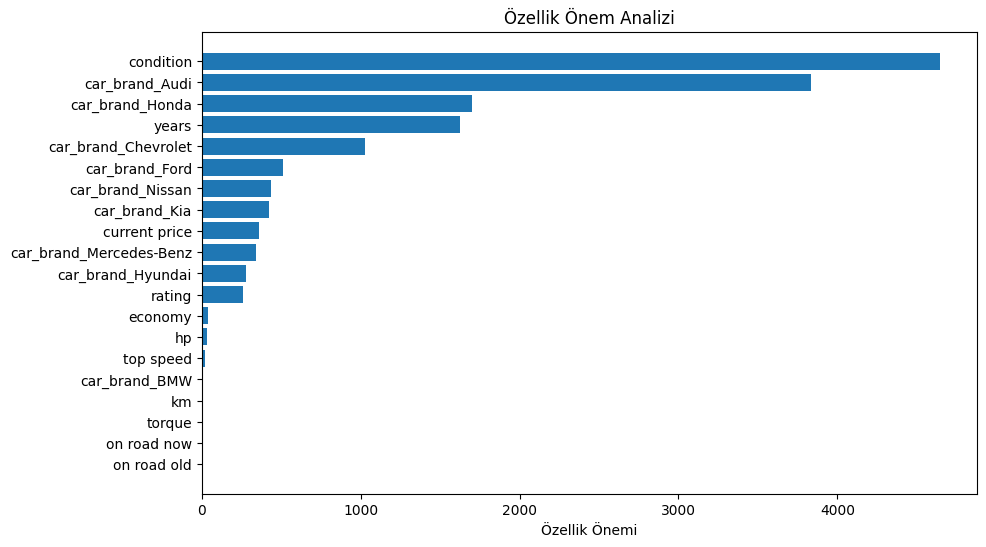

In [133]:
# Özellik isimleri
features = df_encoded.columns

# Özellik önemlerini modelden alalım
if hasattr(model, "coef_"):  # Lineer modeller için
    feature_importance = np.abs(model.coef_)  # Mutlak değer alıyoruz
elif hasattr(model, "feature_importances_"):  # Ağaç tabanlı modeller için
    feature_importance = model.feature_importances_
else:
    feature_importance = np.zeros(X_train.shape[1])

# Özellik önemlerini sıralayalım
sorted_indices = np.argsort(feature_importance)[::-1]

# Grafik
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_indices], feature_importance[sorted_indices])
plt.xlabel("Özellik Önemi")
plt.title("Özellik Önem Analizi")
plt.gca().invert_yaxis()
plt.show()

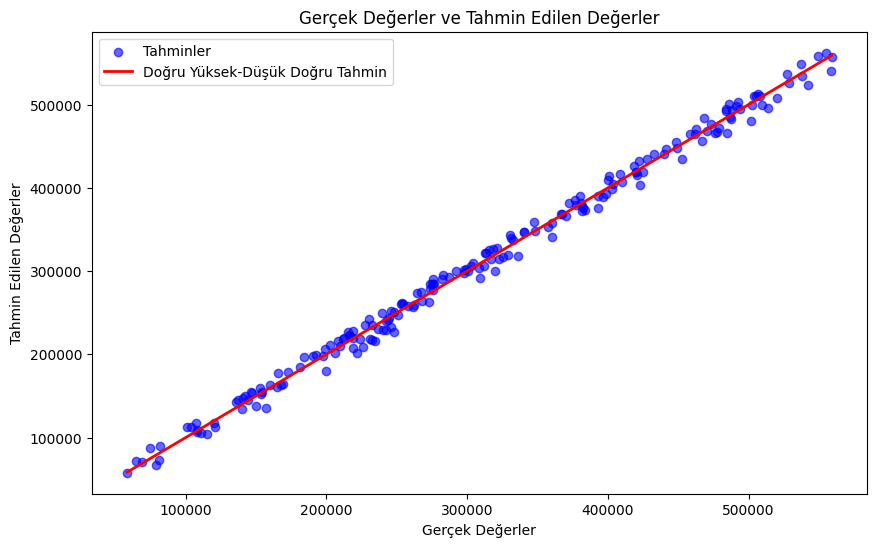

In [134]:
# Gerçek değerler ile tahmin edilen değerleri karşılaştırmak için bir grafik
plt.figure(figsize=(10, 6))

# Gerçek değerleri (test seti) ve tahmin edilen değerleri (modelden) çiziyoruz
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Doğru Yüksek-Düşük Doğru Tahmin')

# Grafik başlığı ve etiketleri
plt.title('Gerçek Değerler ve Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Legend ekleme
plt.legend()

# Grafiği gösterme
plt.show()

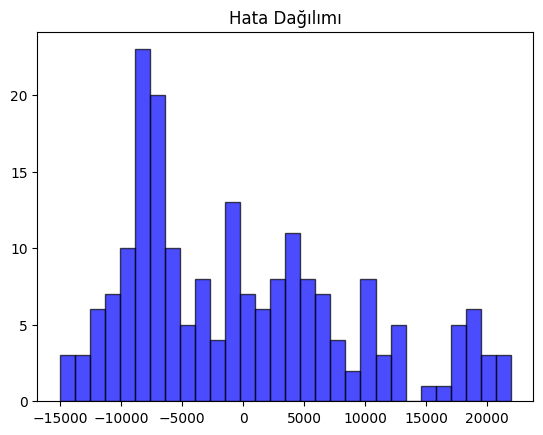

In [135]:
import matplotlib.pyplot as plt
errors = y_test - y_pred
plt.hist(errors, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title("Hata Dağılımı")
plt.show()


In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Modeli oluşturalım
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modeli eğitelim
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [137]:
# Test veri seti üzerinde tahmin yapın
y_pred = rf_model.predict(X_test)

# Hata metriklerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mean_target = y_test.mean()
error_percentage = (rmse / mean_target) * 100

# Sonuçları yazdırın
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")
print(f"Hata Oranı: {error_percentage:.2f}%")


MSE: 373158437.65914446
RMSE: 19317.309275857868
R^2 Score: 0.9778026863847783
Hata Oranı: 6.20%


In [138]:
#hata analizi için

feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)
print(feature_importances)


                    Feature  Importance
3                        km    0.879837
1               on road now    0.055376
0               on road old    0.047759
5                 condition    0.006683
7                 top speed    0.001901
9                    torque    0.001688
8                        hp    0.001636
6                   economy    0.001207
2                     years    0.001093
4                    rating    0.001015
12      car_brand_Chevrolet    0.000255
17  car_brand_Mercedes-Benz    0.000217
13           car_brand_Ford    0.000217
14          car_brand_Honda    0.000205
19         car_brand_Toyota    0.000185
11            car_brand_BMW    0.000175
16            car_brand_Kia    0.000162
18         car_brand_Nissan    0.000145
15        car_brand_Hyundai    0.000143
10           car_brand_Audi    0.000101


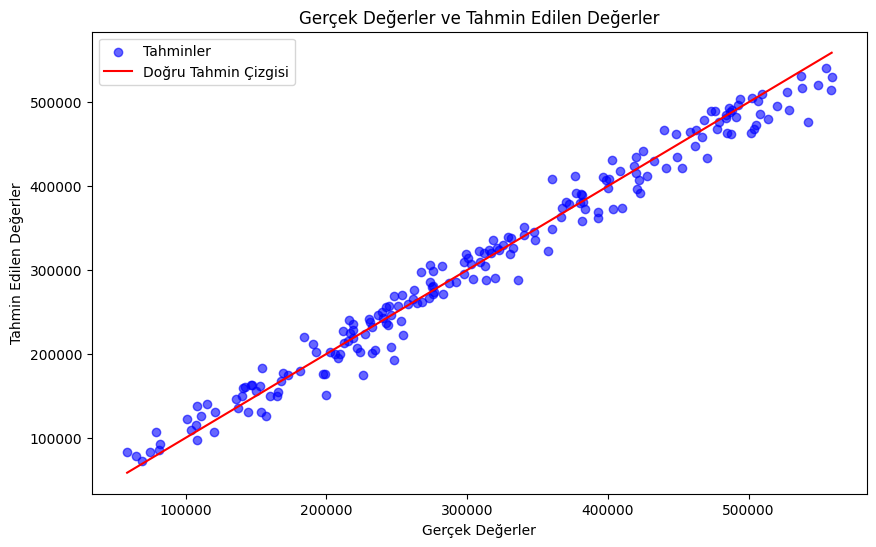

In [139]:
import matplotlib.pyplot as plt

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Tahminler', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Doğru Tahmin Çizgisi')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler ve Tahmin Edilen Değerler")
plt.legend()
plt.show()


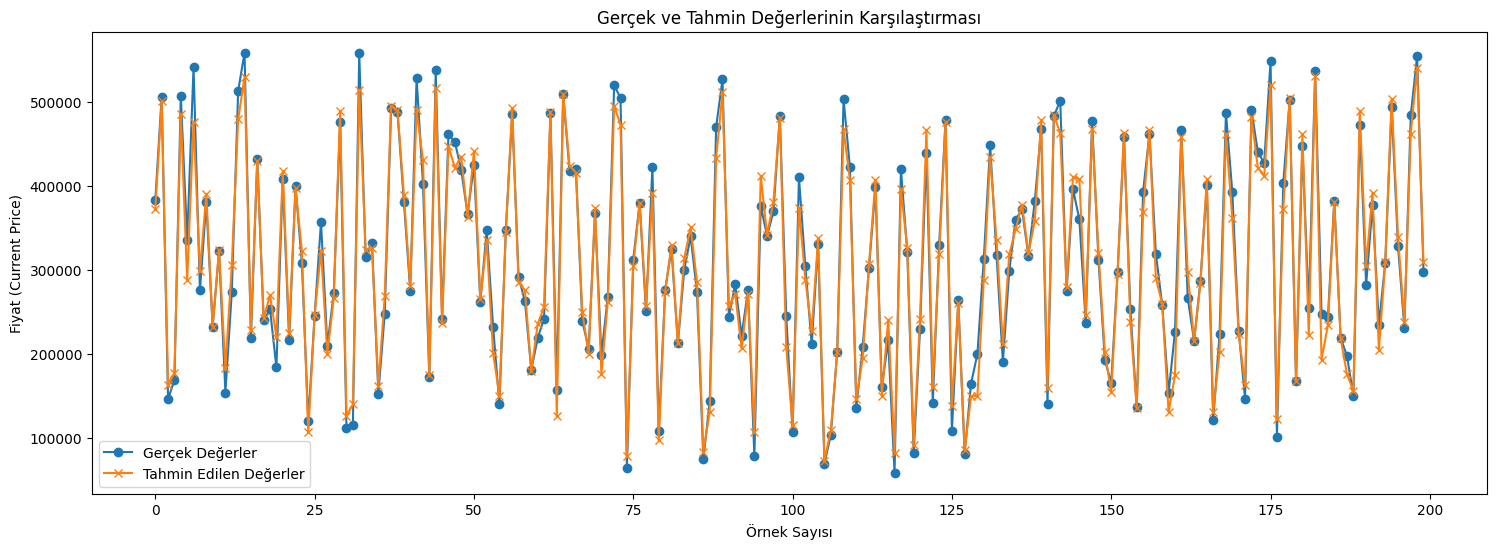

In [140]:
# Test setindeki ilk 200 örneği karşılaştırma
plt.figure(figsize=(18, 6))
plt.plot(range(len(y_test[:200])), y_test[:200], label="Gerçek Değerler", marker='o')
plt.plot(range(len(y_pred[:200])), y_pred[:200], label="Tahmin Edilen Değerler", marker='x')
plt.xlabel("Örnek Sayısı")
plt.ylabel("Fiyat (Current Price)")
plt.title("Gerçek ve Tahmin Değerlerinin Karşılaştırması")
plt.legend()
plt.show()


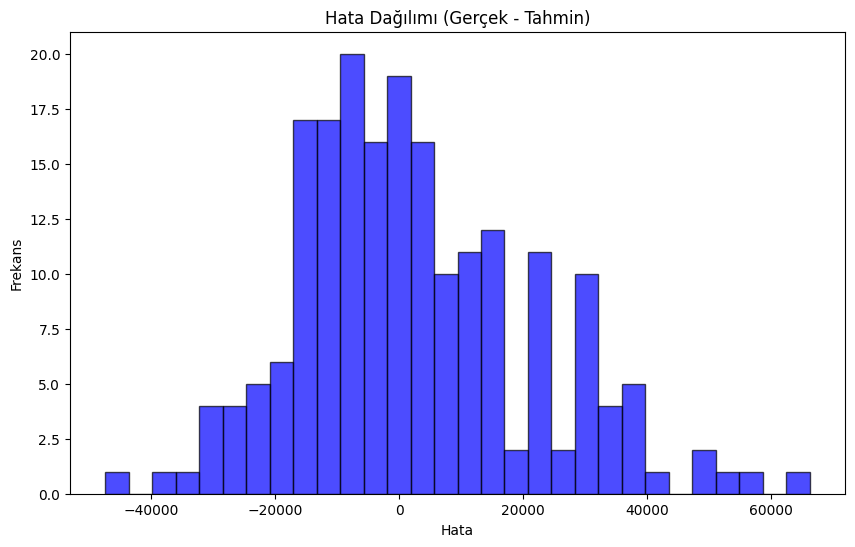

In [141]:
import numpy as np

# Hataları hesapla
errors = y_test - y_pred

# Hata histogramı
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title("Hata Dağılımı (Gerçek - Tahmin)")
plt.xlabel("Hata")
plt.ylabel("Frekans")
plt.show()


XGBOOST


In [142]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost DMatrix kullanımı
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost modeli eğitimi
params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.1,
    "max_depth": 6,
    "seed": 42
}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Tahmin
y_pred = xgb_model.predict(dtest)

# Performans değerlendirme
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
mean_target = y_test.mean()  # Hedef değişkenin ortalamasını bulalım
error_percentage = (rmse / mean_target) * 100
print(f"Hata Oranı: {error_percentage:.2f}%")

MSE: 208413880.73970336
RMSE: 14436.546704101482
R2 Score: 0.987602509267738
Hata Oranı: 4.63%


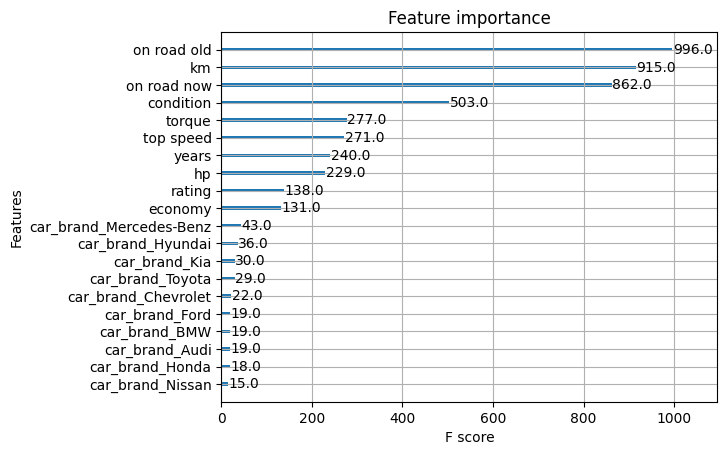

In [143]:
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()

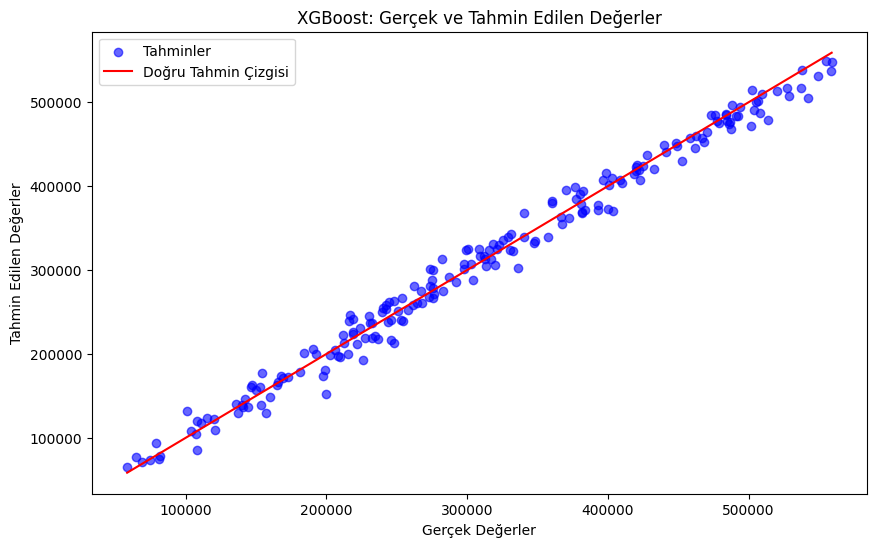

In [144]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Tahminler', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Doğru Tahmin Çizgisi')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("XGBoost: Gerçek ve Tahmin Edilen Değerler")
plt.legend()
plt.show()


In [145]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression


# Linear Regression modelini oluştur ve eğit
lr_model = LinearRegression() # lr_model değişkenini tanımla
lr_model.fit(X_train, y_train) # Modeli eğit


# Tahminler yapma
y_pred_lr = lr_model.predict(X_test)  # Linear Regression
y_pred_rf = rf_model.predict(X_test)  # Random Forest
y_pred_xgb = xgb_model.predict(dtest)  # XGBoost

# Metrikleri hesaplama
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Sonuçları yazdırma
print("Linear Regression:")
print(f"MSE: {mse_lr}, RMSE: {rmse_lr}, R²: {r2_lr}\n")

print("Random Forest:")
print(f"MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}\n")

print("XGBoost:")
print(f"MSE: {mse_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}")


Linear Regression:
MSE: 83771648.15887657, RMSE: 9152.685297707803, R²: 0.9950168471121504

Random Forest:
MSE: 373158437.65914446, RMSE: 19317.309275857868, R²: 0.9778026863847783

XGBoost:
MSE: 208413880.73970336, RMSE: 14436.546704101482, R²: 0.987602509267738


In [146]:
import time

# Linear Regression için eğitim süresi
start_time = time.time()
lr_model.fit(X_train, y_train)
lr_training_time = time.time() - start_time

# Random Forest için eğitim süresi
start_time = time.time()
rf_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

# XGBoost için eğitim süresi
start_time = time.time()
xgb_model = xgb.train(params, dtrain, num_boost_round=100)  # Eğitim başlatılıyor
xgb_training_time = time.time() - start_time

# Eğitim sürelerini yazdırma
print(f"Linear Regression Training Time: {lr_training_time:.4f} seconds")
print(f"Random Forest Training Time: {rf_training_time:.4f} seconds")
print(f"XGBoost Training Time: {xgb_training_time:.4f} seconds")


Linear Regression Training Time: 0.0062 seconds
Random Forest Training Time: 0.7424 seconds
XGBoost Training Time: 0.1595 seconds


In [147]:
# Eğitim seti ve test seti üzerindeki skorları karşılaştırma
r2_train_lr = r2_score(y_train, lr_model.predict(X_train))
r2_test_lr = r2_score(y_test, lr_model.predict(X_test))

r2_train_rf = r2_score(y_train, rf_model.predict(X_train))
r2_test_rf = r2_score(y_test, rf_model.predict(X_test))

r2_train_xgb = r2_score(y_train, xgb_model.predict(dtrain))
r2_test_xgb = r2_score(y_test, xgb_model.predict(dtest))

print(f"Linear Regression - Train R²: {r2_train_lr}, Test R²: {r2_test_lr}")
print(f"Random Forest     - Train R²: {r2_train_rf}, Test R²: {r2_test_rf}")
print(f"XGBoost           - Train R²: {r2_train_xgb}, Test R²: {r2_test_xgb}")


Linear Regression - Train R²: 0.9953478110856049, Test R²: 0.9950168471121504
Random Forest     - Train R²: 0.9971934709136853, Test R²: 0.9778026863847783
XGBoost           - Train R²: 0.9998620427014597, Test R²: 0.987602509267738


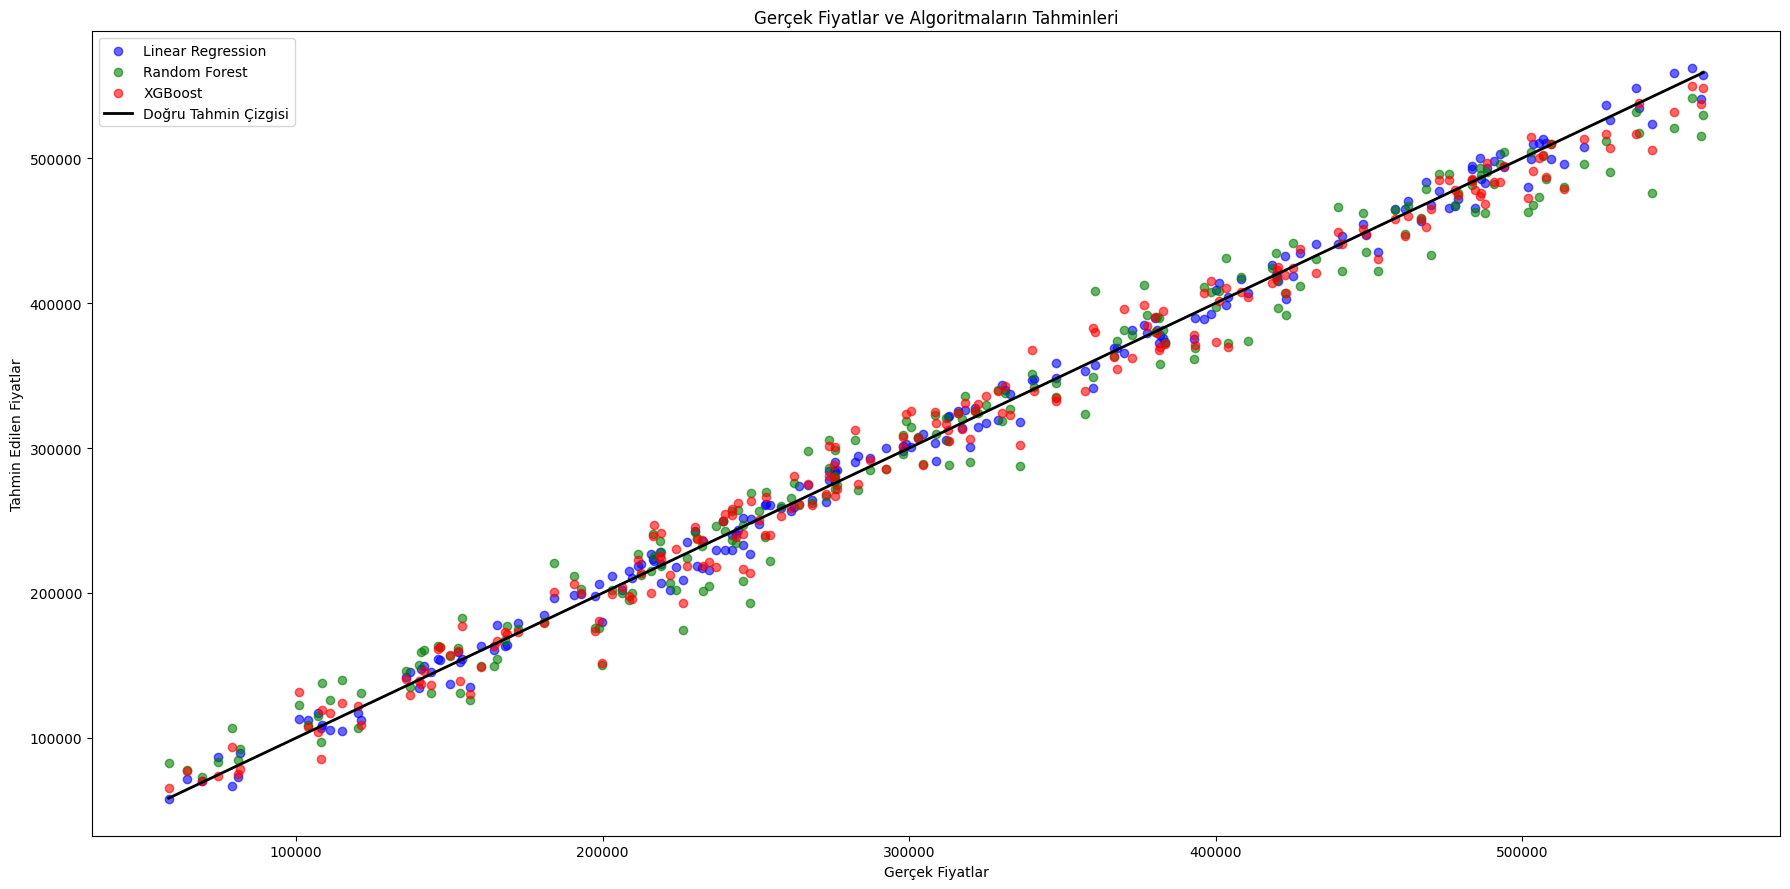

In [148]:
import matplotlib.pyplot as plt

# Gerçek fiyatlar (y_test) ve tahmin edilen fiyatlar (y_pred_lr, y_pred_rf, y_pred_xgb)
plt.figure(figsize=(18, 9))

# Gerçek fiyatlar ile tahmin edilen fiyatlar arasındaki ilişkiyi göstermek
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label='Random Forest')
plt.scatter(y_test, y_pred_xgb, color='red', alpha=0.6, label='XGBoost')

# Gerçek ve tahmin edilen fiyatların doğru eşleşmesini gösteren çizgi (doğru tahminler için)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, label='Doğru Tahmin Çizgisi')

# Grafik başlığı ve etiketleri
plt.title('Gerçek Fiyatlar ve Algoritmaların Tahminleri')
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')

# Efsane (legend) ekleme
plt.legend()

# Grafiği gösterme
plt.tight_layout()
plt.show()


Aşağıdaki kodlar ile rastgele veriler girilerek fiyat tahmini yapılmıştır.

In [154]:
from xgboost import XGBRegressor, DMatrix

# Yeni veriyi tanımlayın
yeni_veri = pd.DataFrame({
    'on road old': [538000],
    'on road now': [823000],
    'years': [2],
    'km': [80000],
    'rating': [3],
    'condition': [4],
    'economy': [10],
    'top speed': [150],
    'hp': [70],
    'torque': [111],
    'car_brand_Audi': [0],
    'car_brand_BMW': [0],
    'car_brand_Chevrolet': [0],
    'car_brand_Ford': [0],
    'car_brand_Honda': [0],
    'car_brand_Hyundai': [1],
    'car_brand_Kia': [0],
    'car_brand_Mercedes-Benz': [0],
    'car_brand_Nissan': [0],
    'car_brand_Toyota': [0],
})

# Linear Regression modelini oluştur ve eğit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest modelini oluştur ve eğit
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# XGBoost modelini oluştur ve eğit
xg_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xg_model.fit(X_train, y_train)


# Yeni verilerle tahmin yapma
y_pred_new_lr = lr_model.predict(yeni_veri)
y_pred_new_rf = rf_model.predict(yeni_veri)
y_pred_new_xgb = xg_model.predict(yeni_veri)  # XGBoost için DMatrix kullanın

# Sonuçları yazdırma
print("Yeni Veri ile Tahminler:")
print(f"Linear Regression Tahmini: {y_pred_new_lr}")
print(f"Random Forest Tahmini: {y_pred_new_rf}")
print(f"XGBoost Tahmini: {y_pred_new_xgb}")
print("Gerçek fiyat: 351318")

Yeni Veri ile Tahminler:
Linear Regression Tahmini: [364881.29325942]
Random Forest Tahmini: [362734.135]
XGBoost Tahmini: [364700.16]
Gerçek fiyat: 351318


In [155]:
# Yeni veriyi tanımlayın
yeni_veri = pd.DataFrame({
    'on road old': [591911],
    'on road now': [861056],
    'years': [6],
    'km': [117220],
    'rating': [5],
    'condition': [9],
    'economy': [9],
    'top speed': [148],
    'hp': [74],
    'torque': [95],
    'car_brand_Audi': [0],
    'car_brand_BMW': [0],
    'car_brand_Chevrolet': [0],
    'car_brand_Ford': [1],
    'car_brand_Honda': [0],
    'car_brand_Hyundai': [0],
    'car_brand_Kia': [0],
    'car_brand_Mercedes-Benz': [0],
    'car_brand_Nissan': [0],
    'car_brand_Toyota': [0],
})

# Linear Regression modelini oluştur ve eğit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest modelini oluştur ve eğit
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# XGBoost modelini oluştur ve eğit
xg_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xg_model.fit(X_train, y_train)


# Yeni verilerle tahmin yapma
y_pred_new_lr = lr_model.predict(yeni_veri)
y_pred_new_rf = rf_model.predict(yeni_veri)
y_pred_new_xgb = xg_model.predict(yeni_veri)  # XGBoost için DMatrix kullanın

# Sonuçları yazdırma
print("Yeni Veri ile Tahminler:")
print(f"Linear Regression Tahmini: {y_pred_new_lr}")
print(f"Random Forest Tahmini: {y_pred_new_rf}")
print(f"XGBoost Tahmini: {y_pred_new_xgb}")
print("Gerçek fiyatı: 285001")

Yeni Veri ile Tahminler:
Linear Regression Tahmini: [280386.7206212]
Random Forest Tahmini: [283688.995]
XGBoost Tahmini: [287435.1]
Gerçek fiyatı: 285001
